In [1]:
# Initial imports
from path import Path
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
%matplotlib inline

In [2]:
# import CSV file into dataframe

file_path = Path("./GS_Test/GS_SentScoreswVOL.csv")
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%y')
df.set_index('Date',inplace=True)
df.sort_index(inplace=True)
df.dropna()


,Ticker,Company,Year,QTR,Sent_Neg,Sent_Neu,Sent_Pos,Price_DayPrior,Price_DayOf,Price_DayAfter,...,PerCngNeu,PerCngPos,PRICE_PerCng_PriorEarnings,PRICE_PerCng_DayPrior,PRICE_PerCng_DayAfter,PRICE_PerCng_2DaysAfter,VOL_PerCng_PriorEarnings,VOL_PerCng_DayPrior,VOL_PerCng_DayAfter,VOL_PerCng_2DaysAfter
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-16,GS,Goldman Sachs,2015.0,Q2,0.025,0.852,0.123,212.96,211.18,212.46,...,0.002,(0.061),0.055,(0.008),0.006,0.006,-26.3%,73.66%,-35.33%,-50.62%
2015-10-15,GS,Goldman Sachs,2015.0,Q3,0.027,0.844,0.129,179.51,184.96,185.18,...,(0.009),0.049,(0.124),0.030,0.001,0.004,29.8%,75.89%,-47.95%,-53.40%
2016-01-20,GS,Goldman Sachs,2015.0,Q4,0.029,0.863,0.107,156.82,153.75,151.65,...,0.023,(0.171),(0.169),(0.020),(0.014),0.020,63.8%,59.87%,-38.75%,-40.40%
2016-04-19,GS,Goldman Sachs,2016.0,Q1,0.031,0.840,0.129,159.02,162.65,166.98,...,(0.027),0.206,0.058,0.023,0.027,0.016,-37.8%,92.39%,-17.66%,-28.58%
2016-07-19,GS,Goldman Sachs,2016.0,Q2,0.024,0.864,0.112,163.33,161.41,161.77,...,0.029,(0.132),(0.008),(0.012),0.002,(0.008),-7.4%,14.05%,-34.30%,-47.12%
2016-10-18,GS,Goldman Sachs,2016.0,Q3,0.022,0.843,0.135,169.00,172.63,174.51,...,(0.024),0.205,0.070,0.021,0.011,0.011,-17.0%,46.42%,-17.99%,-44.87%
2017-01-18,GS,Goldman Sachs,2016.0,Q4,0.024,0.835,0.140,235.74,234.29,231.41,...,(0.009),0.037,0.357,(0.006),(0.012),(0.009),69.3%,20.92%,-39.90%,-31.34%
2017-04-18,GS,Goldman Sachs,2017.0,Q1,0.032,0.825,0.143,226.26,215.59,214.09,...,(0.012),0.021,(0.080),(0.047),(0.007),0.011,64.2%,197.41%,-48.42%,-58.53%
2017-07-18,GS,Goldman Sachs,2017.0,Q2,0.032,0.840,0.128,229.26,223.31,222.87,...,0.018,(0.105),0.036,(0.026),(0.002),(0.005),-48.6%,150.83%,-23.69%,-45.35%


In [3]:
#See List of column titles
for col in df.columns:
    print(col)

Ticker
Company
Year
QTR
Sent_Neg
Sent_Neu
Sent_Pos
Price_DayPrior
Price_DayOf
Price_DayAfter
Price_2DaysAfter
VOL_DayPrior
VOL_DayOf
VOL_DayAfter
VOL_2DaysAfter
PerCngNeg
PerCngNeu
PerCngPos
PRICE_PerCng_PriorEarnings
PRICE_PerCng_DayPrior
PRICE_PerCng_DayAfter
PRICE_PerCng_2DaysAfter
VOL_PerCng_PriorEarnings
VOL_PerCng_DayPrior
VOL_PerCng_DayAfter
VOL_PerCng_2DaysAfter


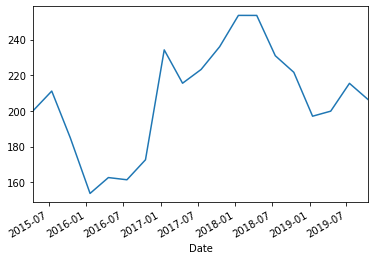

In [4]:
df.Price_DayOf.plot()

In [5]:
 df.iloc[:,4:8].dropna()

,Sent_Neg,Sent_Neu,Sent_Pos,Price_DayPrior
Date,,,,
2015-04-16,0.019,0.850,0.131,201.10
2015-07-16,0.025,0.852,0.123,212.96
2015-10-15,0.027,0.844,0.129,179.51
2016-01-20,0.029,0.863,0.107,156.82
2016-04-19,0.031,0.840,0.129,159.02
2016-07-19,0.024,0.864,0.112,163.33
2016-10-18,0.022,0.843,0.135,169.00
2017-01-18,0.024,0.835,0.140,235.74
2017-04-18,0.032,0.825,0.143,226.26


In [6]:
X= df.iloc[:,4:8].dropna().values
y= df.iloc[:,10:11].dropna().values
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split - 1]
X_test = X[split:]
y_train = y[: split - 1]
y_test = y[split:]


In [7]:
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X)

# Scaling data
X_scaled = X_scaler.transform(X)
#X_test_scaled=X_scaler.transform(X_test)

In [8]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 4

nn = Sequential([
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation=tf.nn.selu),
    Dense(units=1, activation="linear")
])

In [9]:
# Compile the model
nn.compile(loss=tf.losses.mean_squared_error, optimizer=tf.optimizers.RMSprop(0.0099), metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.MeanSquaredError()])

# Train the model
model_1 = nn.fit(X_scaled, y, validation_split=0.3, epochs=200,verbose=False)

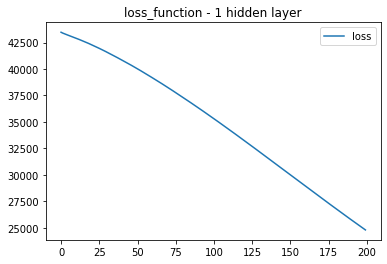

In [10]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [11]:
# Define the model - deep neural net
number_input_features = 4
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn1 = Sequential([
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.nn.selu),
    Dense(units=hidden_nodes_layer2, activation=tf.nn.selu),
    Dense(units=hidden_nodes_layer1, activation=tf.nn.selu),
    #Dense(units=12, activation=tf.nn.selu),
    Dense(units=1, activation="linear")
])

In [12]:
# Compile model
#nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])
nn1.compile(loss=tf.losses.mean_squared_error, optimizer=tf.optimizers.RMSprop(0.0099), metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.MeanSquaredError()])
# Fit the model
model_2 = nn1.fit(X_scaled, y, validation_split=0.3, epochs=200,verbose=False)

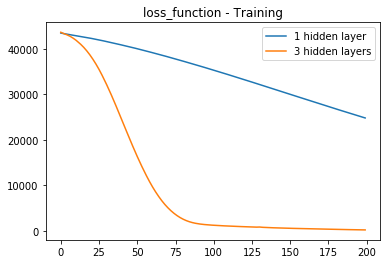

In [13]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "3 hidden layers"])
plt.show()

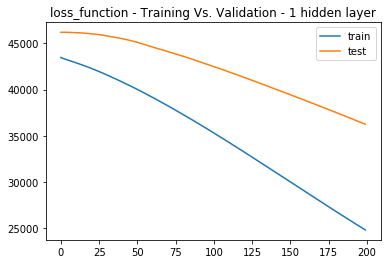

In [14]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

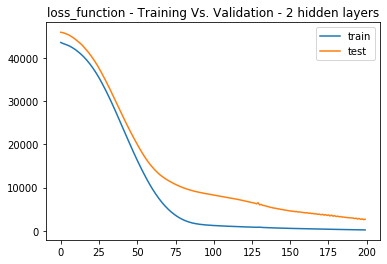

In [15]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])

plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()

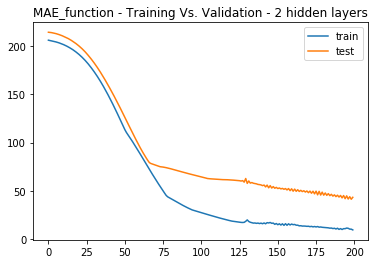

In [16]:
plt.plot(model_2.history['mean_absolute_error'])
plt.plot(model_2.history['val_mean_absolute_error'])
plt.title("MAE_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()

In [17]:
predictions=nn.predict(X_scaled)
predictions

array([[ 24.018856 ],
       [ 36.459682 ],
       [ 68.43739  ],
       [ 33.549767 ],
       [ 94.31641  ],
       [ 18.180237 ],
       [ 55.99163  ],
       [ 77.621826 ],
       [133.0932   ],
       [ 90.56089  ],
       [ 13.562816 ],
       [  7.1513557],
       [ 81.198395 ],
       [ 46.86799  ],
       [ 33.77304  ],
       [ 16.497046 ],
       [  6.1625786],
       [  9.094111 ],
       [ 33.172314 ]], dtype=float32)

In [18]:
def str2float(x):
    return float(x)
file_path = Path("./GS_Test/GS_Percent_Changes.csv")
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%y')
df.set_index('Date',inplace=True)
df.sort_index(inplace=True)
df.dropna()

X= df.iloc[:,0:3].dropna().values
y= df.PRICE_PerCng_DayPrior.dropna().values


In [19]:
# Fitting Standard Scaler
X_scaler = scaler.fit(X)

# Scaling data
X_scaled = X_scaler.transform(X)
number_hidden_nodes = 8
number_input_features = 3

nn = Sequential([
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation=tf.nn.selu),
    Dense(units=1, activation="linear")
])

# Compile the model
nn.compile(loss=tf.losses.mean_squared_error, optimizer=tf.optimizers.RMSprop(0.0099), metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.MeanSquaredError()])

# Train the model
model_1 = nn.fit(X_scaled, y, validation_split=0.3, epochs=200,verbose=False)

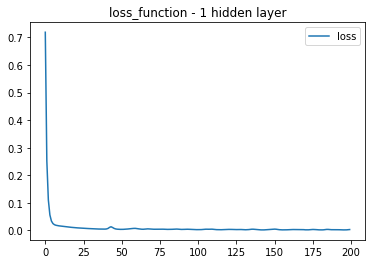

In [20]:
### Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [21]:
number_input_features = 3
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn1 = Sequential([
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.nn.selu),
    Dense(units=hidden_nodes_layer2, activation=tf.nn.selu),
    Dense(units=hidden_nodes_layer1, activation=tf.nn.selu),
    Dense(units=12, activation=tf.nn.selu),
    Dense(units=1, activation="linear")
])
# Compile model
#nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])
nn1.compile(loss=tf.losses.mean_squared_error, optimizer=tf.optimizers.RMSprop(0.0099), metrics=[tf.metrics.MeanAbsoluteError(),tf.metrics.MeanSquaredError()])
# Fit the model
model_2 = nn1.fit(X_scaled, y, validation_split=0.3, epochs=200,verbose=False)

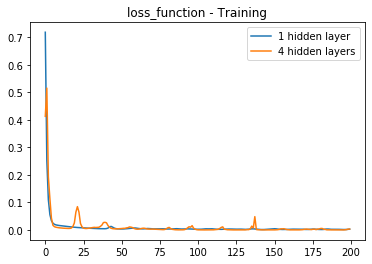

In [22]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "4 hidden layers"])
plt.show()

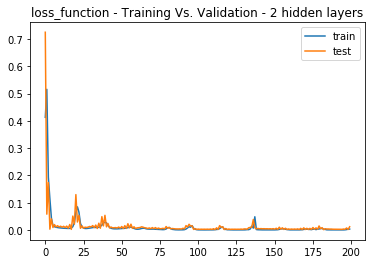

In [23]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])

plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()

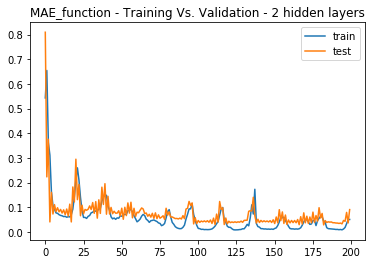

In [24]:
plt.plot(model_2.history['mean_absolute_error'])
plt.plot(model_2.history['val_mean_absolute_error'])
plt.title("MAE_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()